<a href="https://colab.research.google.com/github/iamMchoi/Hello-Kit/blob/master/Lab_Hyperparamter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter tuning

In [0]:
%matplotlib inline
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import pandas as pd

## Data Import

In [2]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

## Compare Learning Rates

In [0]:
from tensorflow.keras.optimizers import SGD

dflist = []

learning_rates = [0.01, 0.05, 0.1, 0.5]

for lr in learning_rates:

  K.clear_session()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

  model.compile(optimizer=SGD(lr=lr),  # Good default optimizer to start with
                loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
                metrics=['accuracy'])  # what to track

  h =  model.fit(x_train, y_train, batch_size=16, verbose=0)  

  dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [7]:
h.history.keys()

dict_keys(['loss', 'acc'])

In [0]:
historydf = pd.concat(dflist, axis=1)

In [0]:
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([learning_rates, metrics_reported],
                                 names=['learning_rate', 'metric'])

historydf.columns = idx

In [10]:
historydf

learning_rate      0.01                0.05                0.10            \
metric              acc      loss       acc      loss       acc      loss   
0              0.804367  0.767849  0.895783  0.361603  0.913883  0.289819   

learning_rate      0.50            
metric              acc      loss  
0              0.921633  0.256541

## Batch Size

In [0]:
dflist = []

batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
  K.clear_session()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

  model.compile(optimizer='sgd',  # Good default optimizer to start with
                loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
                metrics=['accuracy'])  # what to track

  h =  model.fit(x_train, y_train, batch_size=batch_size, verbose=0)  

  dflist.append(pd.DataFrame(h.history, index=h.epoch))  

In [0]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([batch_sizes, metrics_reported],
                                 names=['batch_size', 'metric'])
historydf.columns = idx

In [13]:
historydf

batch_size      16                 32                 64                  128  \
metric          acc      loss      acc      loss      acc      loss       acc   
0           0.81975  0.725545  0.74135  1.077969  0.64755  1.578685  0.502817   

batch_size            
metric          loss  
0           2.039209

## Optimizers

In [0]:
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop

In [0]:
dflist = []

optimizers = ['SGD(lr=0.01)',
              'SGD(lr=0.01, momentum=0.3)',
              'SGD(lr=0.01, momentum=0.3, nesterov=True)',  
              'Adam(lr=0.01)',
              'Adagrad(lr=0.01)',
              'RMSprop(lr=0.01)']

for opt_name in optimizers:

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

  model.compile(optimizer=eval(opt_name),  # Good default optimizer to start with
                loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
                metrics=['accuracy'])  # what to track

  h =  model.fit(x_train, y_train, batch_size=16, verbose=0, epochs=5)  

  dflist.append(pd.DataFrame(h.history, index=h.epoch))     

In [0]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([optimizers, metrics_reported],
                                 names=['optimizers', 'metric'])
historydf.columns = idx

In [18]:
historydf

optimizers SGD(lr=0.01)           SGD(lr=0.01, momentum=0.3)            \
metric              acc      loss                        acc      loss   
0              0.812417  0.730681                   0.835600  0.619871   
1              0.912450  0.303032                   0.919683  0.275779   
2              0.928017  0.248809                   0.935567  0.219742   
3              0.938883  0.212607                   0.946150  0.183709   
4              0.946283  0.185853                   0.954417  0.156224   

optimizers SGD(lr=0.01, momentum=0.3, nesterov=True)           Adam(lr=0.01)  \
metric                                           acc      loss           acc   
0                                           0.838667  0.621695      0.916850   
1                                           0.920750  0.270163      0.947767   
2                                           0.936683  0.215275      0.955900   
3                                           0.947283  0.180083      0.959550   
4                                           0.954683  0.154643      0.962817   

optimizers           Adagrad(lr=0.01)           RMSprop(lr=0.01)            
metric          loss              acc      loss              acc      loss  
0           0.287836         0.930200  0.233111         0.913533  0.415057  
1           0.196682         0.960717  0.131701         0.933817  0.465689  
2           0.172627         0.969250  0.105042         0.940650  0.526929  
3           0.161543         0.973900  0.089392         0.944217  0.521332  
4           0.150057         0.977200  0.078644         0.946467  0.626774

## Initialization

In [0]:
dflist = []

initializers = ['zeros', 'uniform', 'normal',
                'he_normal', 'lecun_uniform']

for init in initializers:

  K.clear_session()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
  model.add(tf.keras.layers.Dense(128, kernel_initializer=init, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(128, kernel_initializer=init, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
  model.add(tf.keras.layers.Dense(10, kernel_initializer=init, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

  model.compile(optimizer='rmsprop',  # Good default optimizer to start with
                loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
                metrics=['accuracy'])  # what to track

  h =  model.fit(x_train, y_train, batch_size=16, verbose=0, epochs=5)  

  
  dflist.append(pd.DataFrame(h.history, index=h.epoch))

In [0]:
historydf = pd.concat(dflist, axis=1)
metrics_reported = dflist[0].columns
idx = pd.MultiIndex.from_product([initializers, metrics_reported],
                                 names=['initializers', 'metric'])

historydf.columns = idx

In [21]:
historydf

initializers     zeros             uniform              normal            \
metric             acc      loss       acc      loss       acc      loss   
0             0.111600  2.301552  0.909317  0.309963  0.921500  0.270653   
1             0.112367  2.301393  0.960917  0.141016  0.963900  0.130431   
2             0.112367  2.301399  0.970400  0.111161  0.972133  0.103420   
3             0.112367  2.301398  0.975217  0.095215  0.977417  0.090106   
4             0.112367  2.301411  0.979233  0.084668  0.979533  0.084339   

initializers he_normal           lecun_uniform            
metric             acc      loss           acc      loss  
0             0.929150  0.239008      0.925950  0.250398  
1             0.966350  0.120205      0.965483  0.124689  
2             0.974600  0.095839      0.973833  0.100596  
3             0.979183  0.081105      0.978400  0.087403  
4             0.982550  0.069928      0.980883  0.077935

## Batch Normalization

In [0]:
from tensorflow.keras.layers import BatchNormalization
import numpy as np

In [0]:
def repeated_training(x_train,
                      y_train,
                      x_test,
                      y_test,
                      do_bn=False,
                      epochs=5,
                      repeats=3):
  histories = []

  for repeat in range(repeats):
    K.clear_session()

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, kernel_initializer='normal', activation=tf.nn.relu))

    if do_bn:
        model.add(BatchNormalization())
        
    model.add(tf.keras.layers.Dense(128, kernel_initializer='normal', activation=tf.nn.relu))
      
    if do_bn:
        model.add(BatchNormalization())

    model.add(tf.keras.layers.Dense(10, kernel_initializer=init, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution
    
    model.compile(optimizer='rmsprop',  # Good default optimizer to start with
                  loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
                  metrics=['accuracy'])  # what to track

    h = model.fit(x_train, y_train,
                  validation_data=(x_test, y_test),
                  epochs=epochs,
                  verbose=0)
    
    histories.append([h.history['acc'], h.history['val_acc']])
    print(repeat, end=' ')

  histories = np.array(histories)

  # calculate mean and standard deviation across repeats:
  mean_acc = histories.mean(axis=0)
  std_acc = histories.std(axis=0)
  print()

  return mean_acc[0], std_acc[0], mean_acc[1], std_acc[1]

In [28]:
mean_acc, std_acc, mean_acc_val, std_acc_val = \
    repeated_training(x_train, y_train, x_test, y_test, do_bn=False)

0 1 2 


In [29]:
mean_acc_bn, std_acc_bn, mean_acc_val_bn, std_acc_val_bn = \
    repeated_training(x_train, y_train, x_test, y_test, do_bn=True)

0 1 2 


In [0]:
def plot_mean_std(m, s):
    plt.plot(m)
    plt.fill_between(range(len(m)), m-s, m+s, alpha=0.1)

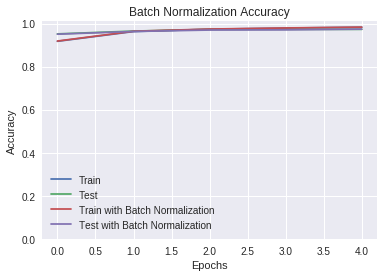

In [31]:
plot_mean_std(mean_acc, std_acc)
plot_mean_std(mean_acc_val, std_acc_val)
plot_mean_std(mean_acc_bn, std_acc_bn)
plot_mean_std(mean_acc_val_bn, std_acc_val_bn)
plt.ylim(0, 1.01)
plt.title("Batch Normalization Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')


## Weight Regularization & Dropout

In [0]:
from tensorflow.keras.layers import Dropout

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(Dropout(0.2))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='rmsprop',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track